In [5]:
import matplotlib.pyplot as plt
import numpy as np
import arcade
import copy

from src.algorithms.aAsterisk import fill_zone_aStar
from src.algorithms.bfs import fill_zone_bfs
from src.algorithms.dfs import fill_zone_dfs
from src.algorithms.greedy import fill_zone_greedy
from src.fillZone import create_grid 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


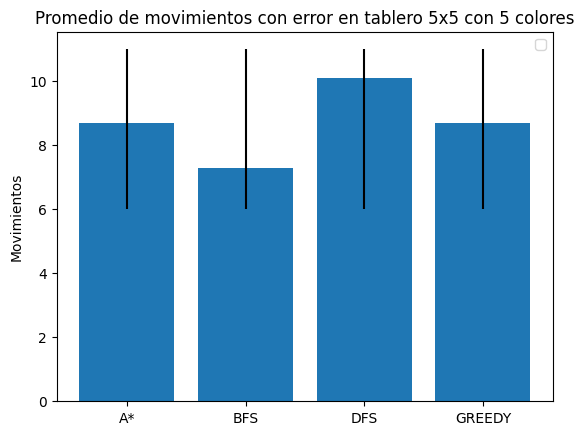

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


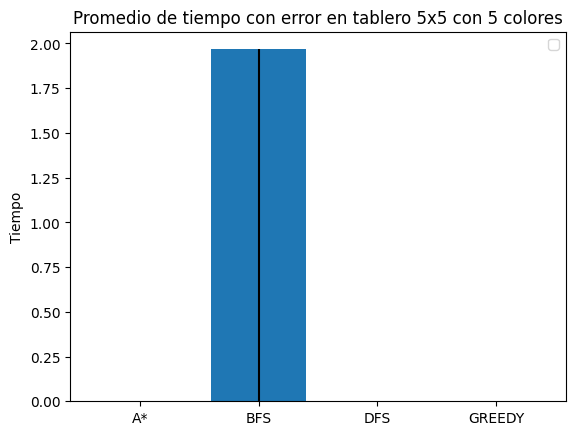

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


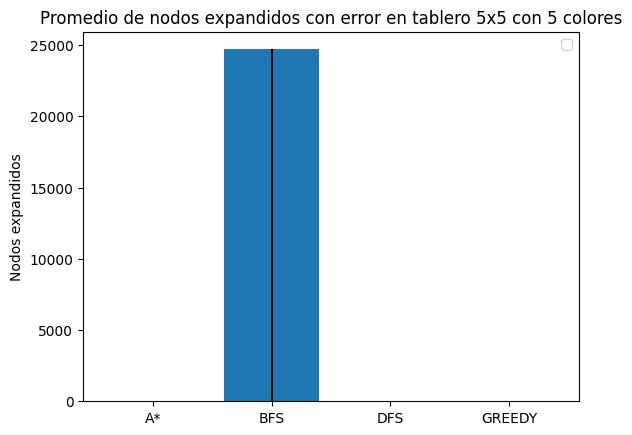

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


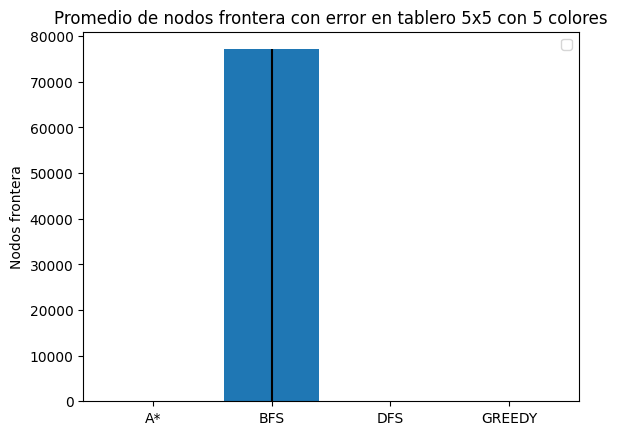

In [7]:
# Estas 3 variables, son las que se tienen que cambiar para generar distintas escenarios
run_times = 10
color_amount = 5
rows_amount = 5

alg_names = ['A*', 'BFS', 'DFS', 'GREEDY']
movements_array=np.empty(10)
time_array = np.empty(10)
nodes_expanded_array = np.empty(10)
nodes_border_array = np.empty(10)
result = np.empty(10)

movements_mean=[]
movements_std=[]
movements_label=[]

times_mean=[]
times_std=[]
times_label=[]

nodes_expanded_mean=[]
nodes_expanded_std=[]
nodes_expanded_label=[]

nodes_border_mean=[]
nodes_border_std=[]
nodes_border_label=[]

grids=[]

for run_time in range(run_times):
    grids.append(create_grid(rows_amount,color_amount))

for algorithm in range(1,5):
    for run_time in range(run_times):
        auxGrid=copy.deepcopy(grids[run_time])
        if(algorithm == 1):
            result = fill_zone_aStar(auxGrid, color_amount)   
        elif(algorithm == 2):
            result = fill_zone_bfs(auxGrid, color_amount)
        elif(algorithm == 3):
            result = fill_zone_dfs(auxGrid, color_amount)
        elif(algorithm == 4):
            result = fill_zone_greedy(auxGrid, color_amount)
        
        movements_array[run_time]=len(result[0])
        time_array[run_time]=result[1]
        nodes_expanded_array[run_time]=result[2]
        nodes_border_array[run_time]=result[3]

    # Promedio de movimientos con error
    movements_mean.append(np.mean(movements_array))
    movements_std.append(np.std(movements_array))
    
    times_mean.append(np.mean(time_array))
    times_std.append(np.std(time_array))
    
    nodes_expanded_mean.append(np.mean(nodes_expanded_array))
    nodes_expanded_std.append(np.std(nodes_expanded_array))
    
    nodes_border_mean.append(np.mean(nodes_border_array))
    nodes_border_std.append(np.std(nodes_border_array))

    movements_lower_err = movements_mean - movements_array.min()
    movements_upper_err = movements_array.max() - movements_mean
    movements_lower_err = np.maximum(0, movements_lower_err)
    movements_upper_err = np.maximum(0, movements_upper_err)

    times_lower_err = times_mean - time_array.min()
    times_upper_err = time_array.max() - times_mean
    times_lower_err = np.maximum(0, times_lower_err)
    times_upper_err = np.maximum(0, times_upper_err)

    nodes_expanded_lower_err = nodes_expanded_mean - min(nodes_expanded_array)
    nodes_expanded_upper_err = max(nodes_expanded_array) - nodes_expanded_mean
    nodes_expanded_lower_err = np.maximum(0, nodes_expanded_lower_err)
    nodes_expanded_upper_err = np.maximum(0, nodes_expanded_upper_err)

    nodes_border_lower_err = nodes_border_mean - nodes_border_array.min()
    nodes_border_upper_err = nodes_border_array.max() - nodes_border_mean
    nodes_border_lower_err = np.maximum(0, nodes_border_lower_err)
    nodes_border_upper_err = np.maximum(0, nodes_border_upper_err)

plt.bar([1,2,3,4], movements_mean, yerr=[movements_lower_err, movements_upper_err])
plt.xticks([1,2,3,4], alg_names)
plt.ylabel('Movimientos')
plt.title('Promedio de movimientos con error en tablero {}x{} con {} colores'.format(str(rows_amount),str(rows_amount),str(color_amount)))
plt.legend()
plt.show()

plt.bar([1,2,3,4], times_mean, yerr=[times_lower_err, times_upper_err])
plt.xticks([1,2,3,4], alg_names)
plt.ylabel('Tiempo')
plt.title('Promedio de tiempo con error en tablero {}x{} con {} colores'.format(str(rows_amount),str(rows_amount),str(color_amount)))
plt.legend()
plt.show()

plt.bar([1,2,3,4], nodes_expanded_mean, yerr=[nodes_expanded_lower_err, nodes_expanded_upper_err])
plt.xticks([1,2,3,4], alg_names)
plt.ylabel('Nodos expandidos')
plt.title('Promedio de nodos expandidos con error en tablero {}x{} con {} colores'.format(str(rows_amount),str(rows_amount),str(color_amount)))
plt.legend()
plt.show()

plt.bar([1,2,3,4], nodes_border_mean, yerr=[nodes_border_lower_err, nodes_border_upper_err])
plt.xticks([1,2,3,4], alg_names)
plt.ylabel('Nodos frontera')
plt.title('Promedio de nodos frontera con error en tablero {}x{} con {} colores'.format(str(rows_amount),str(rows_amount),str(color_amount)))
plt.legend()
plt.show()